## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [4]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['5k_PEG', 'PS_COOH', '5k_PEG_NH2', 'PS_NH2']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [2]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                #os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_5k_PEG_2mM_XY01.csv
features_5k_PEG_2mM_XY02.csv
features_5k_PEG_2mM_XY03.csv
features_5k_PEG_2mM_XY04.csv
features_5k_PEG_2mM_XY05.csv
features_5k_PEG_2mM_XY06.csv
features_5k_PEG_2mM_XY07.csv
features_5k_PEG_2mM_XY08.csv
features_5k_PEG_2mM_XY09.csv
features_5k_PEG_2mM_XY10.csv
features_PS_COOH_2mM_XY01.csv
features_PS_COOH_2mM_XY02.csv
features_PS_COOH_2mM_XY03.csv
features_PS_COOH_2mM_XY04.csv
features_PS_COOH_2mM_XY05.csv
features_PS_COOH_2mM_XY06.csv
features_PS_COOH_2mM_XY07.csv
features_PS_COOH_2mM_XY08.csv
skip filename: features_PS_COOH_2mM_XY09.csv
features_PS_COOH_2mM_XY10.csv
features_5k_PEG_NH2_2mM_XY01.csv
features_5k_PEG_NH2_2mM_XY02.csv
features_5k_PEG_NH2_2mM_XY03.csv
features_5k_PEG_NH2_2mM_XY04.csv
features_5k_PEG_NH2_2mM_XY05.csv
features_5k_PEG_NH2_2mM_XY06.csv
features_5k_PEG_NH2_2mM_XY07.csv
features_5k_PEG_NH2_2mM_XY08.csv
features_5k_PEG_NH2_2mM_XY09.csv
features_5k_PEG_NH2_2mM_XY10.csv
features_PS_NH2_2mM_XY01.csv
features_PS_NH2_2mM_XY02.csv
feature

In [ ]:
fstats_new.to_csv('features.csv')

In [ ]:
fstats_tot.shape

In [5]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

(496469, 69)
(704180, 69)
(381189, 69)
(11781, 69)


In [6]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(mws)].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [8]:
ncomp = 14
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.21476388943256447
1 component: 0.35318164364712634
2 component: 0.44837275759149187
3 component: 0.5115352780548059
4 component: 0.5586795303617217
5 component: 0.604549528485776
6 component: 0.6424985149094536
7 component: 0.6765642472524748
8 component: 0.7057273555725897
9 component: 0.7336283100835841
10 component: 0.7567660266308589
11 component: 0.7766178706990123
12 component: 0.7952730173816959
13 component: 0.8124064219594435


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

In [13]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [14]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Mean alpha', 'Std alpha',
       'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object')

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [9]:
import numpy as np
#ncomp = 10
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG_NH2'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_NH2'].values[:, -ncomp:], axis=0)

In [ ]:
dicti[3]

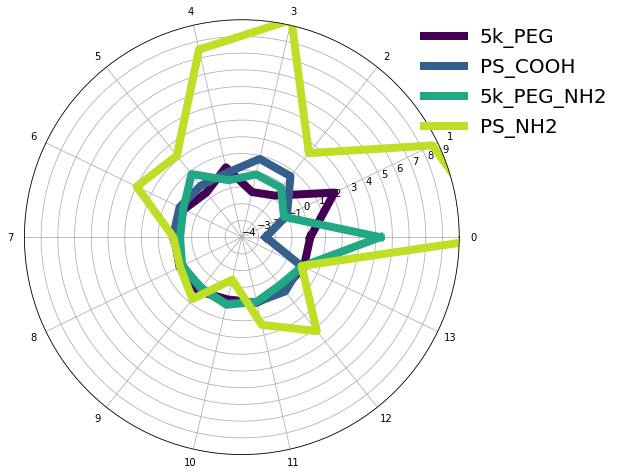

In [12]:
labels = mws
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 9, 14))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [15]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Mean Deff1,Mean AR,asymmetry3,Mean Quality,Std asymmetry1,Std efficiency,trappedness,frames,D_fit,Std SN_Ratio,Std MSD_ratio,Std MSD_ratio,Std kurtosis,kurtosis
1,Mean fractal_dim,Mean asymmetry3,asymmetry2,Quality,Std asymmetry2,Std straightness,boundedness,straightness,Deff1,Std kurtosis,Mean MSD_ratio,Mean MSD_ratio,Mean_Intensity,SN_Ratio
2,Mean D_fit,Std asymmetry3,asymmetry1,Mean_Intensity,Mean asymmetry1,Mean frames,alpha,trappedness,kurtosis,Mean SN_Ratio,Std boundedness,Std SN_Ratio,Mean kurtosis,Quality
3,Std frames,Mean elongation,elongation,Mean SN_Ratio,Mean asymmetry2,Mean straightness,D_fit,boundedness,alpha,Mean kurtosis,Std trappedness,SN_Ratio,Std Quality,fractal_dim
4,Std fractal_dim,Std AR,efficiency,Mean elongation,Mean alpha,Mean efficiency,MSD_ratio,efficiency,boundedness,D_fit,Std SN_Ratio,Mean AR,SN_Ratio,Std SN_Ratio


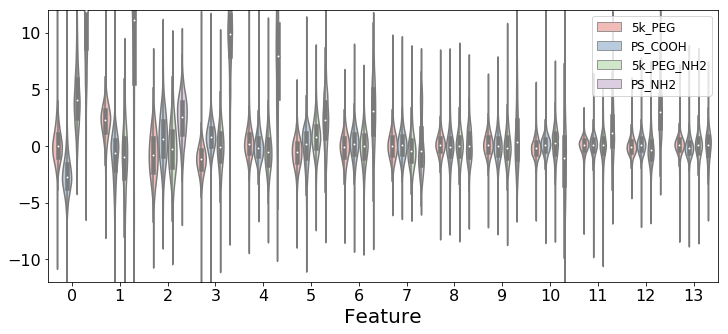

In [16]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

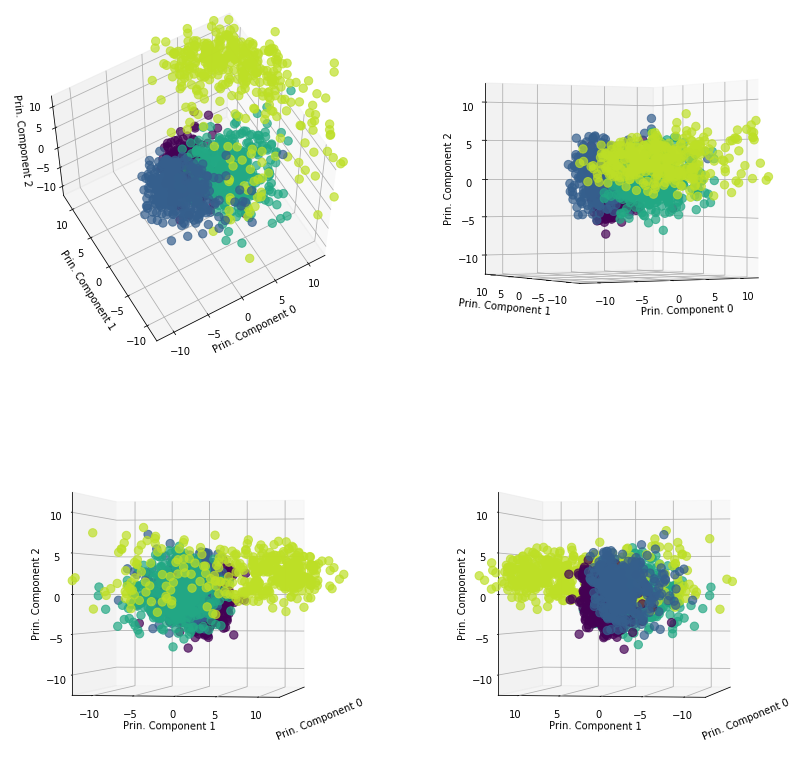

In [17]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 1, 2])

## Neural Network

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [19]:
featofvar = 'Particle Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.07828806
Validation score: 0.978278
Iteration 2, loss = 0.06202590
Validation score: 0.981573
Iteration 3, loss = 0.05299785
Validation score: 0.984114
Iteration 4, loss = 0.04538001
Validation score: 0.986770
Iteration 5, loss = 0.03926169
Validation score: 0.986812
Iteration 6, loss = 0.03466097
Validation score: 0.989835
Iteration 7, loss = 0.03075627
Validation score: 0.990682
Iteration 8, loss = 0.02765424
Validation score: 0.993464
Iteration 9, loss = 0.02511936
Validation score: 0.993809
Iteration 10, loss = 0.02301536
Validation score: 0.994154
Iteration 11, loss = 0.02146924
Validation score: 0.992229
Iteration 12, loss = 0.01997391
Validation score: 0.994959
Iteration 13, loss = 0.01887216
Validation score: 0.995482
Iteration 14, loss = 0.01795917
Validation score: 0.995524
Iteration 15, loss = 0.01710894
Validation score: 0.997103
Iteration 16, loss = 0.01642279
Validation score: 0.997176
Iteration 17, loss = 0.01605859
Validation score: 0.996988
Iterat

Text(0,0.5,'Validation Scores')

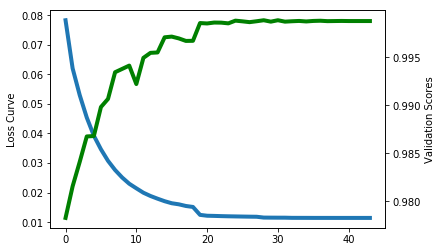

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')